In [9]:
import json
import matplotlib.pyplot as plt
from collections import Counter
from pathlib import Path
import os
from os.path import normpath
from pathlib import PureWindowsPath
import numpy as np


def convert(path):
    return PureWindowsPath(normpath(PureWindowsPath(path).as_posix())).as_posix()


# import spacy

chemin_du_fichier = convert(r"winogrande_1.1\train_xs.jsonl")
l_option1 = []
l_option2 = []
with open(chemin_du_fichier, "r", encoding="utf-8") as fichier:
    for ligne in fichier:
        try:
            # Charger chaque ligne comme un objet JSON
            data = json.loads(ligne)
            l_option1.append(data["option1"])
            l_option2.append(data["option2"])

             # Traite ou affiche l'objet JSON
        except json.JSONDecodeError as e:
            print(f"Erreur de décodage JSON dans la ligne : {ligne}")
            print(e)


def frequency(l):
    counter = Counter(l)
    # Trie les mots par fréquence décroissante
    sorted_words = sorted(counter.items(), key=lambda x: x[1], reverse=True)
    sorted_words = [[word, freq] for word, freq in sorted_words]
    for i in range(len(sorted_words)):
        sorted_words[i][1] /= 2

    return sorted_words


words_and_occurences_sorted_option1 = frequency(l_option1)
words_and_occurences_sorted_option2 = frequency(l_option2)


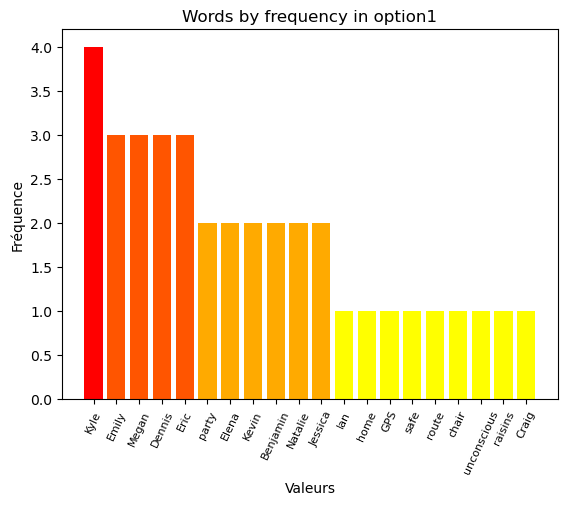

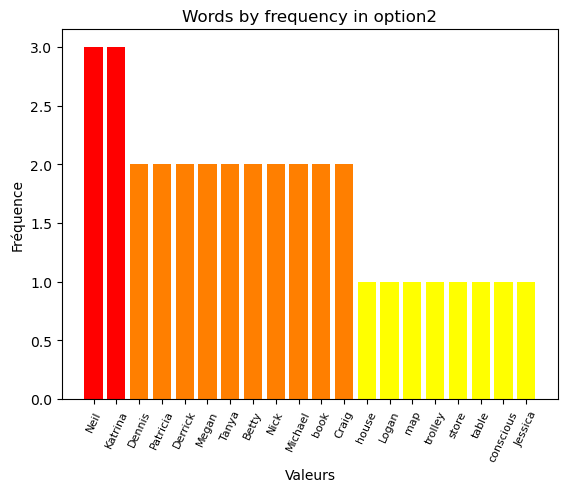

In [10]:
from matplotlib import colors

def frequency_plot(x,y,plot_name):
# Créer un colormap allant du rouge au bleu
    cmap = colors.LinearSegmentedColormap.from_list("red_to_blue", ["yellow", "red"])

# Normaliser les fréquences entre 0 et 1 pour les appliquer au colormap
    norm = plt.Normalize(min(y), max(y))

# Créer une figure et un axe
    fig, ax = plt.subplots()

# Dessiner l'histogramme avec un dégradé de couleur
    for i in range(len(x)):
        ax.bar(x[i], y[i], width=0.8, color=cmap(norm(y[i])), align='center')


# Titres et labels
    plt.title(plot_name)
    plt.xlabel("Valeurs")
    plt.ylabel("Fréquence")
    plt.xticks(rotation=65) 
    plt.tick_params(axis='x', which='major', labelsize=8)
    plt.show()


plot_name = "Words by frequency in option1"
x1 = [row[0] for row in words_and_occurences_sorted_option1]
y1 = [row[1] for row in words_and_occurences_sorted_option1]
frequency_plot(x1[:20],y1[:20],plot_name)

plot_name = "Words by frequency in option2"
x2 = [row[0] for row in words_and_occurences_sorted_option2]
y2 = [row[1] for row in words_and_occurences_sorted_option2]
frequency_plot(x2[:20],y2[:20],plot_name)



In [13]:
ratio1 = len(words_and_occurences_sorted_option1) / (len(l_option1) * 2)

print(ratio1)
words_and_occurences[1][1]
prev_max


0.196875


NameError: name 'words_and_occurences' is not defined

In [ ]:
from scipy.optimize import curve_fit


# Définir la fonction exponentielle pour l'ajustement
def exp_func(x, A, lambda_):
    return A * np.exp(-lambda_ * x) + 1

def exp_model_and_plot(x_values,y_values):
    # Ajuster la fonction exponentielle aux données
    rangs = np.arange(1, len(x_values) + 1)
    params, covariance = curve_fit(exp_func, rangs, y_values, p0=[1, 0.1])

# Extraire les paramètres ajustés A et lambda
    A_estime = 8
    A_estime, lambda_estime = params
    

# Générer les valeurs ajustées
    x_fit = np.linspace(min(rangs), max(rangs), 1375)
    y_fit = exp_func(x_fit, *params)

# Visualiser les données et l'ajustement
    plt.plot(rangs, y_values, label="Données", color="blue")
    plt.plot(x_fit, y_fit, label=f"Ajustement exponentiel\nA={A_estime:.2f}, λ={lambda_estime:.2f}", color="red")
    plt.xlabel('rangs')
    plt.ylabel('frequency')
    plt.legend()
    plt.title('Ajustement de la loi exponentielle')
    plt.show()
    
    residus = y_values - y_fit

# Somme totale des carrés (variance des valeurs réelles autour de leur moyenne)
    SS_tot = np.sum((y_values - np.mean(y_values))**2)

# Somme des carrés des résidus
    SS_res = np.sum(residus**2)

# Coefficient de détermination R²
    R_squared = 1 - (SS_res / SS_tot)

# Affichage du résultat
    print(f"R² : {R_squared:.4f}")
    print(f"Paramètre estimé A : {A_estime:.2f}")
    print(f"Paramètre estimé lambda : {lambda_estime:.2f}")

exp_model_and_plot(x1,y1)
exp_model_and_plot(x2,y2)

In [ ]:
def similarity_percentage(sent1, sent2):
    nb_common_words = 0
    sent1 = sent1.split()
    sent2 = sent2.split()
    
    for word in sent1 :
        if word in sent2:
            nb_common_words +=1
    ratio = nb_common_words / max(len(sent1), len(sent2))
    return ratio

x="c'est la raison de"
y="c'est la raison de"
similarity_percentage(x,y)

